In [1]:
import Match_Scrim_Trans_Info
from MySQLConnection import *
import pandas as pd 
import numpy as np 
import mysql_auth
from matplotlib import pyplot as plt 
import seaborn as sns 
from MatchLog import *

In [2]:
matchlog = MatchLog(match_id='37256')

In [3]:
df_FinalStat = matchlog.get_df_FinalStat()
display(df_FinalStat)

TimePlayed  \
MatchId num_map Map              map_type Section RoundName    Timestamp                        Team             Player     Hero                        
37256   1       Lijiang Tower    CONTROL  1.0     Night Market 2021-04-17 09:10:20.393000+00:00 Guangzhou Charge ChoiSehwan Symmetra         0.971892   
                                                                                                                 Cr0ng      Sigma            0.971892   
                                                                                                                 Jihun      Wrecking Ball    1.942560   
                                                                                                                 KariV      Zenyatta         0.971892   
                                                                                                                 Mandu      Brigitte         0.971892   
...                                                                                                                                               ...   
        4       Temple of Anubis ASSAULT  2.0                  2021-04-17 10:32:29.506000+00:00 Shanghai Dragons LIP        Widowmaker     151.813000   
                                                                                                                 LeeJaeGon  Brigitte       151.813000   
                                                                                                                            Lucio          112.897000   
                                                                                                                            Mercy          159.671000   
                                                                                                                 Void       D.Va           424.381000   

                                                                                                                                           Eliminations  \
MatchId num_map Map              map_type Section RoundName    Timestamp                        Team             Player     Hero                          
37256   1       Lijiang Tower    CONTROL  1.0     Night Market 2021-04-17 09:10:20.393000+00:00 Guangzhou Charge ChoiSehwan Symmetra                0.0   
                                                                                                                 Cr0ng      Sigma                   0.0   
                                                                                                                 Jihun      Wrecking Ball           0.0   
                                                                                                                 KariV      Zenyatta                0.0   
                                                                                                                 Mandu      Brigitte                0.0   
...                                                                                                                                                 ...   
        4       Temple of Anubis ASSAULT  2.0                  2021-04-17 10:32:29.506000+00:00 Shanghai Dragons LIP        Widowmaker              0.0   
                                                                                                                 LeeJaeGon  Brigitte                0.0   
                                                                                                                            Lucio                   0.0   
                                                                                                                            Mercy                   0.0   
                                                                                                                 Void       D.Va                    0.0   

                                                                                                                                     

In [4]:
sample = df_FinalStat.xs([1, 1], level=['num_map', 'Section'], drop_level=False)
TF = sample.groupby(['MatchId', 'num_map', 'Map', 'map_type', 'Section', 'RoundName', 'Timestamp']).sum()[['HeroDamageDealt/s', 'FinalBlows/s', 'RCP']].rolling(2, min_periods=1).sum()

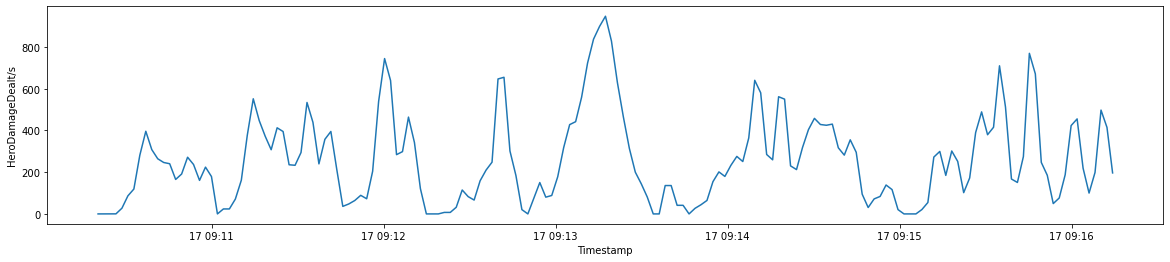

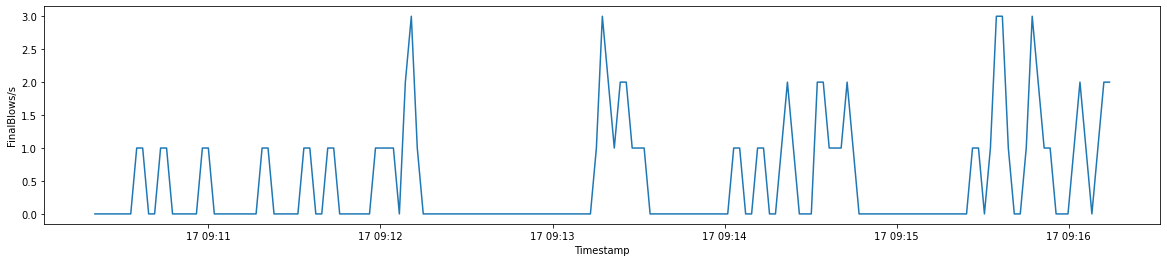

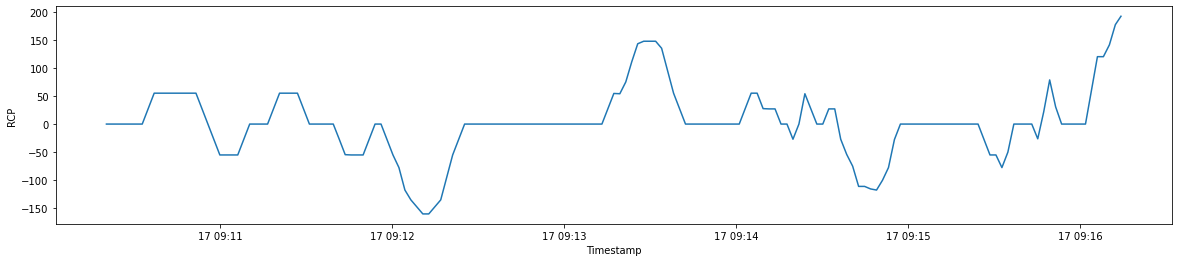

In [11]:
plt.figure(figsize=(20,4))
sns.lineplot(x='Timestamp', y='HeroDamageDealt/s', data=TF)
plt.show()
plt.figure(figsize=(20,4))
sns.lineplot(x='Timestamp', y='FinalBlows/s', data=TF)
plt.show()
plt.figure(figsize=(20,4))
sns.lineplot(x='Timestamp', y='RCP', data=TF)
plt.show()

In [6]:
df_FinalStat.to_csv('df_FinalStat.csv')